# Pyber Ride Sharing Data Analysis

As a whole, urban cities outrank suburban and rural cities, with significant more numbers of rides, drivers and fares.

This result indicates the major factor contributing to the total number of rides, is the number of drivers, as 80% of the drivers are based in the urban cities.

Looking at the total fares by city type, in the suburbs we can see that 30% of the total fares is in direct correlation with 26%  of the total rides. 

The rural areas account for less than 10% of the rides and fares, while only 2% of the drivers serve these areas.

The results indicate, just because most of the drivers are in the urban cities they do not make, on average as much money per ride, as their counterparts in the suburbs and rural areas.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
#load files

city_data_df = pd.read_csv("city_data.csv")
ride_data_df= pd.read_csv("ride_data.csv")



city_data_df.head()
#ride_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [16]:
# Combine the data into a single dataset

combined_data = pd.merge(city_data_df, ride_data_df,how='inner',on="city")

combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [17]:
total_fare_per_city = combined_data.groupby("city").sum()["fare"]
total_rides_per_city = combined_data.groupby("city").count()["ride_id"]



average_fare_per_city = total_fare_per_city/total_rides_per_city


average_fare_per_city.head()


city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
dtype: float64

In [18]:
total_drivers_per_city = combined_data.groupby("city")["driver_count"].unique()


total_drivers_per_city.head()

city
Amandaburgh      [12]
Barajasview      [26]
Barronchester    [11]
Bethanyland      [22]
Bradshawfurt      [7]
Name: driver_count, dtype: object

# Bubble Plot of Ride Sharing Data

In [19]:

#Obtain the x and y coordinates for each of the three city types


city_type = combined_data.groupby("city")["type"].unique()

city_type.head()


city
Amandaburgh         [Urban]
Barajasview         [Urban]
Barronchester    [Suburban]
Bethanyland      [Suburban]
Bradshawfurt        [Rural]
Name: type, dtype: object

In [20]:
# maka a new dataframe
Summary_table = pd.DataFrame ({"Type" : city_type, "Fares" : average_fare_per_city,
                           "Drivers" : total_drivers_per_city, "Rides" : total_rides_per_city})




Summary_table.head()

,Type,Fares,Drivers,Rides
city,,,,
Amandaburgh,[Urban],24.641667,[12],18
Barajasview,[Urban],25.332273,[26],22
Barronchester,[Suburban],36.422500,[11],16
Bethanyland,[Suburban],32.956111,[22],18
Bradshawfurt,[Rural],40.064000,[7],10


In [21]:
# take each city type and groupby the drivers, and fares , rides


Urban = Summary_table[Summary_table.Type == 'Urban']

Suburban = Summary_table[Summary_table.Type == 'Suburban']

Rural = Summary_table[Summary_table.Type == 'Rural']


Urban.head()



,Type,Fares,Drivers,Rides
city,,,,
Amandaburgh,[Urban],24.641667,[12],18
Barajasview,[Urban],25.332273,[26],22
Carriemouth,[Urban],28.314444,[52],27
Christopherfurt,[Urban],24.501852,[41],27
Deanville,[Urban],25.842632,[49],19


In [22]:

#unlocking driver data

print(Urban["Drivers"].map(lambda x: x[0]))



city
Amandaburgh             12
Barajasview             26
Carriemouth             52
Christopherfurt         41
Deanville               49
East Kaylahaven         65
Erikaland               37
Grahamburgh             61
Huntermouth             37
Hurleymouth             36
Jerryton                64
Johnton                 27
Joneschester            39
Justinberg              39
Karenberg               22
Karenside                5
Lake Danielberg         19
Lake Jonathanshire       5
Lake Scottton           58
Leahton                 17
Liumouth                69
Loganberg               23
Martinezhaven           25
New Jacobville          50
New Kimberlyborough     33
New Paulton             44
New Paulville           44
North Barbara           18
North Jasmine           33
North Jason              6
                        ..
Port Johnbury            3
Port Samanthamouth      57
Raymondhaven            11
Reynoldsfurt            67
Richardfort             38
Roberthaven            

<function matplotlib.pyplot.show(*args, **kw)>

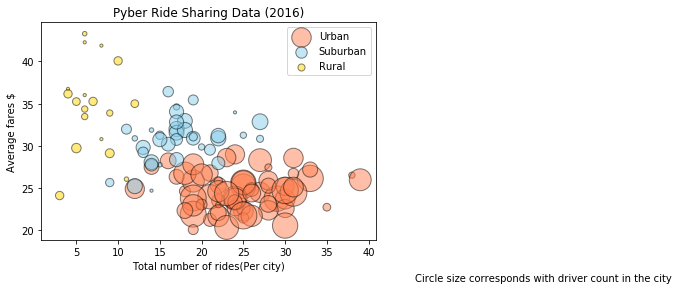

In [23]:
plt.scatter(Urban.Rides, Urban.Fares, marker="o", label ="Urban" , s=((Urban["Drivers"].map(lambda x: x[0]))*10), facecolors="coral", edgecolors="black",
             alpha=0.50)
plt.scatter(Suburban.Rides,Suburban.Fares, marker="o", label ="Suburban", s=((Suburban["Drivers"].map(lambda x: x[0]))*10),facecolors="skyblue", edgecolors="black",
           alpha=0.50)
plt.scatter(Rural.Rides, Rural.Fares, marker="o", label ="Rural", s=((Rural["Drivers"].map(lambda x: x[0]))*10),facecolors="gold", edgecolors="black",
            alpha=0.50)

plt.xlabel("Total number of rides(Per city)")
plt.ylabel("Average fares $")
plt.title("Pyber Ride Sharing Data (2016)")


# Create a legend
plt.legend(loc="best")

plt.figtext(0.99, 0.01,'Circle size corresponds with driver count in the city', va='top')
plt.savefig("Pyber ride sharing data scatter plot.png")

# Set the upper and lower limits of our y axis
plt.ylim(0,45)
plt.xlim(0,45)

plt.show

# ## Total Fares by City Type


In [25]:
Urban_df = Summary_table[Summary_table.Type == 'Urban']

Suburban_df = Summary_table[Summary_table.Type == 'Suburban']

Rural_df = Summary_table[Summary_table.Type == 'Rural']



Total_Fares_Urban = (Urban_df['Fares'].sum(axis=0))
Total_Fares_Suburban = (Suburban_df['Fares'].sum(axis=0))
Total_Fares_Rural = (Rural_df['Fares'].sum(axis=0))

Total_Fares = Total_Fares_Urban + Total_Fares_Suburban + Total_Fares_Rural

Total_Fares_Urban_percentage = (Total_Fares_Urban/Total_Fares)*100
Total_Fares_Suburban_percentage = (Total_Fares_Suburban/Total_Fares)*100
Total_Fares_Rural_percentage = (Total_Fares_Rural/Total_Fares)*100



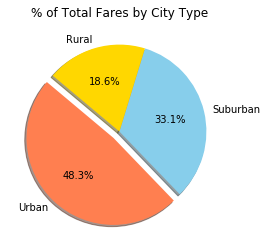

In [26]:
# Build Pie Chart


# Labels for the sections of our pie chart
labels = ["Urban","Suburban","Rural"]

# The values of each section of the pie chart
sizes = [Total_Fares_Urban_percentage,Total_Fares_Suburban_percentage,Total_Fares_Rural_percentage]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0,)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("% of Total Fares by City Type")
plt.savefig("Total fares by city type.png")
plt.show()


# Total Rides by City Type

In [27]:
Urban_df = Summary_table[Summary_table.Type == 'Urban']

Suburban_df = Summary_table[Summary_table.Type == 'Suburban']

Rural_df = Summary_table[Summary_table.Type == 'Rural']

Total_Rides_Urban = (Urban_df['Rides'].sum(axis=0))
Total_Rides_Suburban = (Suburban_df['Rides'].sum(axis=0))
Total_Rides_Rural = (Rural_df['Rides'].sum(axis=0))

Total_Rides = Total_Rides_Urban + Total_Rides_Suburban + Total_Rides_Rural

Total_Rides_Urban_percentage = (Total_Rides_Urban/Total_Rides)*100
Total_Rides_Suburban_percentage = (Total_Rides_Suburban/Total_Rides)*100
Total_Rides_Rural_percentage = (Total_Rides_Rural/Total_Rides)*100

print(Total_Rides_Urban_percentage)
print(Total_Rides_Suburban_percentage)
print(Total_Rides_Rural_percentage)

68.42105263157895
26.31578947368421
5.263157894736842


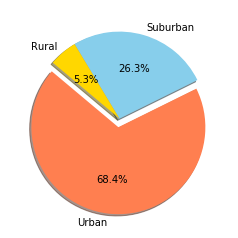

In [28]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban","Suburban","Rural"]

# The values of each section of the pie chart
sizes = [Total_Rides_Urban_percentage,Total_Rides_Suburban_percentage,Total_Rides_Rural_percentage]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0,)

plt.title = ("% of rides by city type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("Total rides by city type.png")


plt.show()


# Total Drivers by City Type

In [29]:
Urban = Summary_table[Summary_table.Type == 'Urban']

Suburban = Summary_table[Summary_table.Type == 'Suburban']

Rural = Summary_table[Summary_table.Type == 'Rural']




Total_Drivers_Urban = (Urban['Drivers'].sum(axis=0))
Total_Drivers_Suburban = (Suburban['Drivers'].sum(axis=0))
Total_Drivers_Rural = (Rural['Drivers'].sum(axis=0))


print(Total_Drivers_Urban)
print(Total_Drivers_Suburban)
print(Total_Drivers_Rural)




[2405]
[490]
[78]


In [30]:
Total_Drivers = Total_Drivers_Urban + Total_Drivers_Suburban + Total_Drivers_Rural

Total_Drivers_Urban_percentage = (Total_Drivers_Urban/Total_Drivers)*100
Total_Drivers_Suburban_percentage = (Total_Drivers_Suburban/Total_Drivers)*100
Total_Drivers_Rural_percentage = (Total_Drivers_Rural/Total_Drivers)*100

print(Total_Drivers_Urban_percentage)
print(Total_Drivers_Suburban_percentage)
print(Total_Drivers_Rural_percentage)

[80.89471914]
[16.48166835]
[2.62361251]


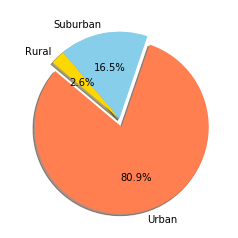

In [31]:
# Build Pie Charts

# Labels for the sections of our pie chart
labels = ["Urban","Suburban","Rural"]

# The values of each section of the pie chart
sizes = [80.89471914,16.48166835,2.62361251]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0,)

plt.title =("% of drivers by city type")


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Total drivers by city type.png")


plt.show()
